<a href="https://colab.research.google.com/github/juandavidarcila/Metodos-Computacionales/blob/main/Actividades-Complementaria/ArcilaJuan_Ejercicio2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Libraries

## Problema







Considere el potencial electrico entre dos cargas de la misma magnitud pero de signo opuesto medido en la posición $\vec{r}$ desde el centro de coordenadas dado por,

$$ V(\vec{r}) = \frac{q}{4\pi \epsilon_0}\Bigg[\frac{1}{|\vec{r}-\vec{r_+}|}-\frac{1}{|\vec{r}-\vec{r_-}|}\Bigg], $$

donde $\vec{r_+}$, y $\vec{r_-}$, son las posiciones de las cargas positivas y negativas respectivamente. En este ejercicio solamente nos vamos a enfocar en las dimensiones $x$ y $y$.

Dados los siguientes parametros,


$$\vec{r_+} = (-0.25\text{ m}, 0), \quad \vec{r_-} = (0.25\text{ m}, 0), \quad \frac{q}{4\pi \epsilon_0} = 1, $$


y que el campo electrico está dado por,

$$\vec{E}(\vec{r}) = -\vec{\nabla} V(\vec{r}),$$

use la derivada central para graficar el campo electrico en el plano xy, gráfique en el plano $R \in [-1, 1] \times [-1, 1] \text{ m}$ con pasos de $0.1 \text{ m}$. Para la gráfica vectorial use,
```
ax.quiver(x[i],y[j],Ex[i,j],Ey[i,j])
```
Al final el resultado debe ser similar al siguiente gráfico,

![](https://raw.githubusercontent.com/diegour1/Datafiles/main/Images/MC1_img2.png)



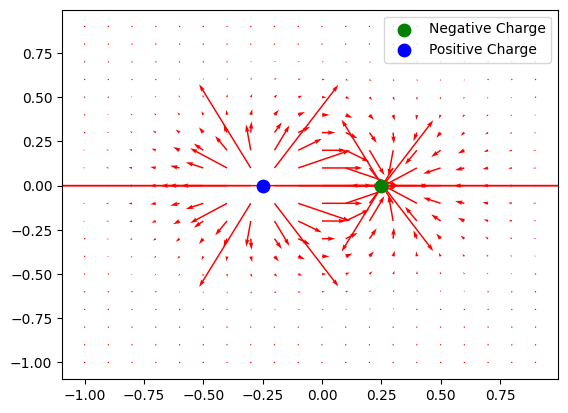

In [1]:
### su codigo aqui

import numpy as np
import matplotlib.pyplot as plt

N = 20
x = np.arange(-1, 1, 0.1)
y = np.arange(-1, 1, 0.1)

fuentes = np.zeros((2,2))
fuentes[0] = [0.25, 0]
fuentes[1] = [-0.25,0]

cargas = [-1, 1]

Ex = np.zeros((N,N))
Ey = np.zeros((N,N))

def GetField(x,y,r0,q):
  x0 = r0[0]
  y0 = r0[1]

  Ex = (q*( x-x0 ))/((x-x0)**2 + (y-y0)**2)**(3/2)
  Ey = (q*( y-y0 ))/((x-x0)**2 + (y-y0)**2)**(3/2)

  return Ex, Ey

for q in range(fuentes.shape[0]):
  for i in range(N):
    for j in range(N):
      Ex[i,j] += GetField(x[i],y[j], fuentes[q], cargas[q])[0]
      Ey[i,j] += GetField(x[i],y[j], fuentes[q], cargas[q])[1]

Ex = np.zeros((N,N))
Ey = np.zeros((N,N))

def PotencialElectrico(x,y,r0,q):
    x0, y0 = r0
    r1 = (x-x0)**2 + (y-y0)**2
    return q / np.sqrt(r1)

def PartialDerivativeX(x,y,r0,f,q,h=0.001):
    return -(f(x+h, y, r0, q) - f(x-h, y, r0, q)) / (2*h)

def PartialDerivativeY(x,y,r0,f,q,h=0.001):
    return -(f(x, y+h, r0, q) - f(x, y-h, r0, q)) / (2*h)

for k in range(fuentes.shape[0]):
  for i in range(N):
    for j in range(N):
      Ex[i,j] += PartialDerivativeX(x[i], y[j], fuentes[k], PotencialElectrico, cargas[k])
      Ey[i,j] += PartialDerivativeY(x[i], y[j], fuentes[k], PotencialElectrico, cargas[k])

for i in range(N):
    for j in range(N):
        plt.quiver(x[i], y[j], Ex[i,j], Ey[i,j], color='red', scale_units='xy', scale=150, angles='xy', width=0.003)


plt.scatter(*fuentes[0], color='green', s=80, label= 'Negative Charge')
plt.scatter(*fuentes[1], color='blue', s=80, label= 'Positive Charge')
plt.legend(loc='upper right')
